In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
df = pd.read_csv('cleaned_energy_data.csv')

In [4]:
df.drop('color_code',axis=1, inplace = True)

In [5]:
# assign each meter to a color coding. Because of plotting

# first get list of unique meters
unique_meters = df['meter_id'].unique()

# create list of colors to assign to
color_map = plt.get_cmap('Paired',len(unique_meters))

# create dictionary to of meters and their colors
colors = {val: color_map(i) for i,val in enumerate(unique_meters)}

# assign color to each row 
df['color_code'] = df['meter_id'].apply(lambda x: colors[x])

In [6]:
df['meter_id'].value_counts()

IKD201    124791
IKD202     88630
BED222     70742
BED203     60690
BED202     59458
IBD210     58238
BED201     54775
IBD205     49738
IKD204     48713
BED205     43745
PED202     42536
AED201     38662
IBD209     36904
IBD212     35277
IBD207     32308
IBD213     23910
IBD240     23088
IBD217     22923
BED204     20365
IKD203     14183
IBD301     13833
IBD208     11411
IBD214     11312
IBD216      8685
BED221      6868
BED208      4793
PED203      1954
IBD204      1497
BED207      1292
IBD219       987
PED201       480
IBD218       460
BED206       428
AED202       185
BED209       122
BED220        67
BED213        17
IBD220        13
BED225         9
BED217         8
BED216         8
BED215         6
BED218         3
AED203         2
Name: meter_id, dtype: int64

**Let's work on 5 meters**

In [7]:
df1 = df[df['meter_id'].isin(['IKD201','BED202','AED201','PED202','IBD209'])]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302351 entries, 0 to 1012161
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   meter_id        302351 non-null  object 
 1   timestamp       302351 non-null  object 
 2   current         302351 non-null  float64
 3   voltage         302351 non-null  float64
 4   frequency       302351 non-null  float64
 5   power_factor    302351 non-null  float64
 6   energy          302351 non-null  float64
 7   real_power      302351 non-null  float64
 8   reactive_power  302351 non-null  float64
 9   apparent_power  302351 non-null  float64
 10  color_code      302351 non-null  object 
dtypes: float64(8), object(3)
memory usage: 27.7+ MB


In [9]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

C:\Users\Oluwajuwon\AppData\Local\Temp\ipykernel_10920\2636251428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


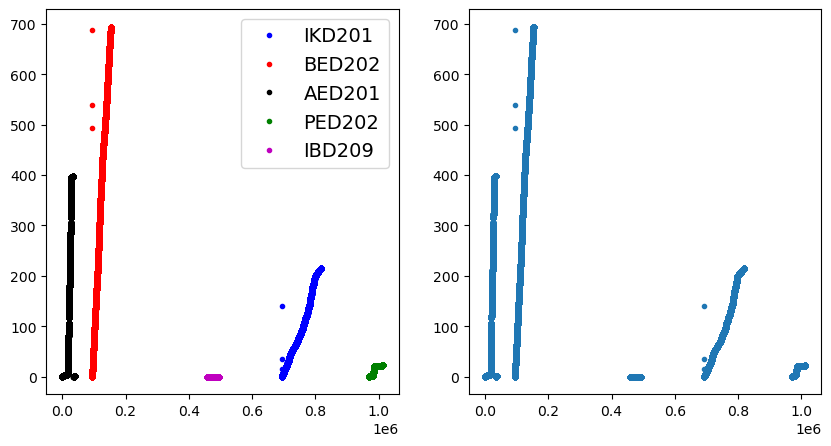

In [10]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(df1[df1['meter_id']=='IKD201']['energy'],'b.',label='IKD201')
plt.plot(df1[df1['meter_id']=='BED202']['energy'],'r.',label='BED202')
plt.plot(df1[df1['meter_id']=='AED201']['energy'],'k.',label='AED201')
plt.plot(df1[df1['meter_id']=='PED202']['energy'],'g.',label='PED202')
plt.plot(df1[df1['meter_id']=='IBD209']['energy'],'m.',label='IBD209')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df1['energy'],'.')
plt.show()

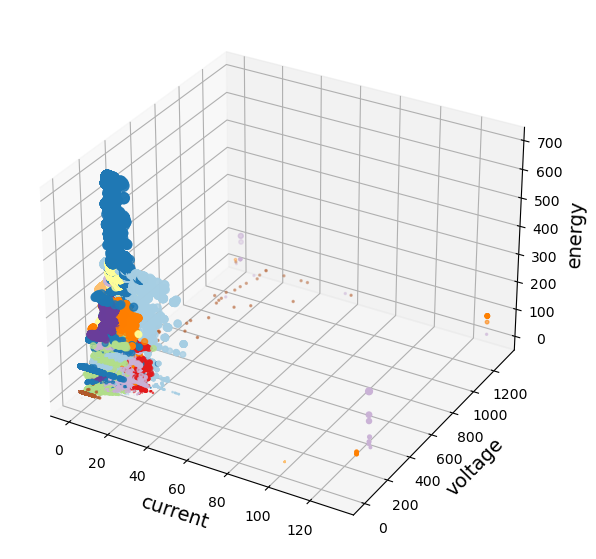

In [126]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['current'],df['voltage'],
           df['energy'],c=df['color_code'], s = df['energy']/10)
ax.set_xlabel('current')
ax.set_ylabel('voltage')
ax.set_zlabel('energy')
plt.show()

### PCA

In [125]:
df

,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,color_code
0,AED201,2022-10-17 08:49:15+01:00,0.33,221.96,50.06,0.00,0.0201,0.00,73.25,73.25,"(0.6509803921568628, 0.807843137254902, 0.8901..."
1,AED201,2022-10-17 08:50:09+01:00,0.42,221.04,50.11,0.66,0.0206,61.56,70.08,93.28,"(0.6509803921568628, 0.807843137254902, 0.8901..."
2,AED201,2022-10-17 08:51:03+01:00,0.39,221.00,50.10,0.72,0.0214,61.74,59.51,85.75,"(0.6509803921568628, 0.807843137254902, 0.8901..."
3,AED201,2022-10-17 08:51:57+01:00,0.37,220.88,50.14,0.75,0.0222,61.63,54.35,82.17,"(0.6509803921568628, 0.807843137254902, 0.8901..."
4,AED201,2022-10-29 14:52:26+01:00,0.23,213.38,50.24,0.92,0.0237,45.94,19.56,49.93,"(0.6509803921568628, 0.807843137254902, 0.8901..."
...,...,...,...,...,...,...,...,...,...,...,...
1014111,PED203,2022-10-28 14:21:59+01:00,0.07,209.46,50.28,0.30,0.1104,4.52,14.39,15.08,"(0.6941176470588235, 0.34901960784313724, 0.15..."
1014112,PED203,2022-10-28 14:22:53+01:00,0.07,209.98,50.26,0.31,0.1104,4.43,13.58,14.28,"(0.6941176470588235, 0.34901960784313724, 0.15..."
1014113,PED203,2022-10-28 14:23:47+01:00,0.07,209.50,50.30,0.31,0.1104,4.29,13.15,13.83,"(0.6941176470588235, 0.34901960784313724, 0.15..."
1014114,PED203,2022-10-28 14:24:41+01:00,0.07,209.70,50.28,0.32,0.1104,4.43,13.11,13.84,"(0.6941176470588235, 0.34901960784313724, 0.15..."


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

In [127]:
df_energy = df.iloc[:,2:10]

In [128]:
pca_trans = pca.fit_transform(df_energy)
pca_df = pd.DataFrame(data=pca_trans, columns=['col1','col2'])

In [130]:
pca_df.shape

(1014116, 2)

In [129]:
df.shape

(1014116, 11)

In [110]:
df_details.shape

(302351, 2)

In [113]:
df_details.reset_index(drop=True, inplace=True)
pca_df.reset_index(drop=True, inplace=True)

df_pca = pd.concat([df_details,pca_df],axis=1)

In [114]:
df_pca

,meter_id,color_code,col1,col2
0,AED201,"(0.6509803921568628, 0.807843137254902, 0.8901...",-403.504414,32.129135
1,AED201,"(0.6509803921568628, 0.807843137254902, 0.8901...",-356.397867,-9.757368
2,AED201,"(0.6509803921568628, 0.807843137254902, 0.8901...",-365.996322,-18.185057
3,AED201,"(0.6509803921568628, 0.807843137254902, 0.8901...",-370.721144,-22.157651
4,AED201,"(0.6509803921568628, 0.807843137254902, 0.8901...",-416.802679,-39.889161
...,...,...,...,...
302346,PED202,"(0.6941176470588235, 0.34901960784313724, 0.15...",-487.728299,-31.242030
302347,PED202,"(0.6941176470588235, 0.34901960784313724, 0.15...",-487.712467,-31.234127
302348,PED202,"(0.6941176470588235, 0.34901960784313724, 0.15...",-487.729019,-31.242412
302349,PED202,"(0.6941176470588235, 0.34901960784313724, 0.15...",-487.744883,-31.250273


### Clustering

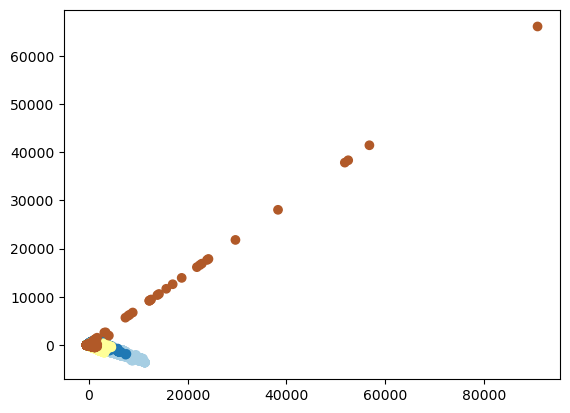

In [116]:
plt.scatter(df_pca['col1'],df_pca['col2'],c=df_pca['color_code']);

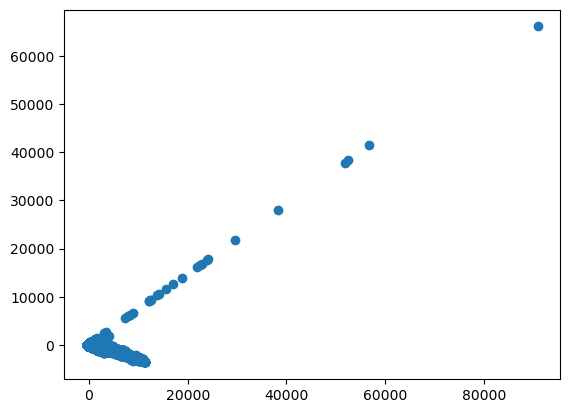

In [118]:
plt.scatter(df_pca['col1'],df_pca['col2']);

**KMeans**

In [119]:
from sklearn.cluster import KMeans

In [121]:
pca_df

,col1,col2
0,-403.504414,32.129135
1,-356.397867,-9.757368
2,-365.996322,-18.185057
3,-370.721144,-22.157651
4,-416.802679,-39.889161
...,...,...
302346,-487.728299,-31.242030
302347,-487.712467,-31.234127
302348,-487.729019,-31.242412
302349,-487.744883,-31.250273


In [123]:
a = KMeans(n_clusters=3).fit(pca_df)

In [124]:
kmeans_df = [KMeans(n_clusters=k).fit(pca_df) for k in range(1,10)]

71731895586.02164